# Рабочая тетрадь №8 Григорьев Максим Эдуардович КРБО-01-21

# 1.1.1 Задание
### ***Требуется провести кластерный анализ данных методом k-средних.***

C:\Users\alexs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


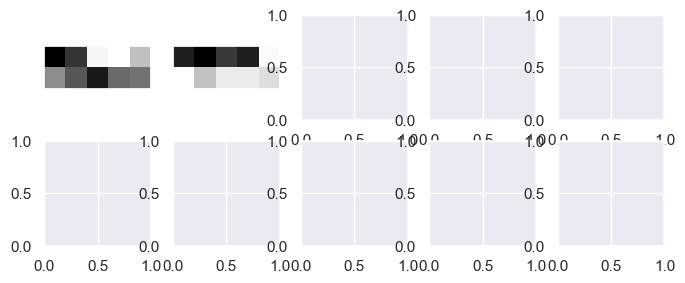

In [5]:
import matplotlib
import seaborn as sns; sns.set()
import numpy as np 
from sklearn.cluster import KMeans
from matplotlib import pyplot
#Вводим массив данных, который в дальнейшем будем кластеризовывать
x = np.array([[5,3],
        [10,15],
        [15,12],
        [24,10],
        [30,45],
        [85,70],
        [71,80],
        [60,78],
        [55,52],
    [80,91],])
x.data.shape
#Выполняем кластеризацию
kmeans = KMeans(n_clusters = 10, random_state = 0, max_iter=1000)
cluster = kmeans.fit_predict(x.data)
kmeans.cluster_centers_.shape

fix, ax = pyplot.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(2, 2, 5)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

### ***Выполните кластеризацию для набора данных ирисов Фишера. Выполните предсказания для модели. Поэкспериментируйте с количеством кластеров.***

C:\Users\alexs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


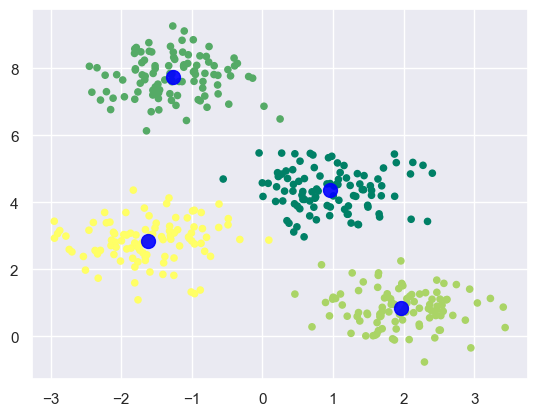

In [6]:
import matplotlib as pyplot
import seaborn as sns; sns.set()
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
#Загрузим набор цифр
iris = sns.load_dataset('iris')
#Загрузим и визуализируем центры кластеров
X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)

kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

#Покрасим центры и собранные кластеры и выведем всё в график
matplotlib.pyplot.scatter(X[:, 0], X[:, 1],c = y_kmeans, s = 20, cmap = 'summer')
centers = kmeans.cluster_centers_
matplotlib.pyplot.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9)
matplotlib.pyplot.show()

# 1.1.2 Задание
### ***Выполните иерархическую кластеризацию для набора данных об ирисах Фишера. При этом необходимо использовать любые два признака (всего их четыре).***

['setosa' 'versicolor' 'virginica']
     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]
(149, 4)


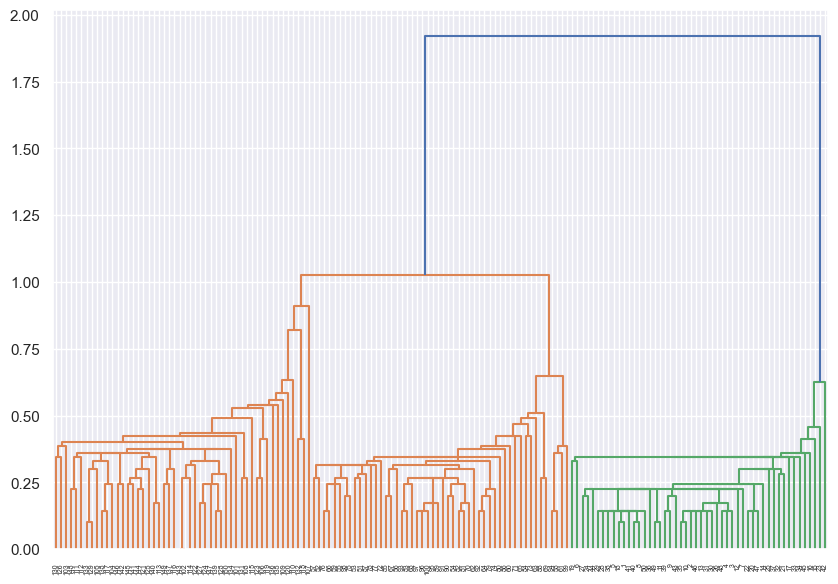

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
#Построим таблицу набора данных об ирисах Фишера
iris = sns.load_dataset('iris')
print(iris.iloc[:,-1].unique())
iris = iris.replace({'setosa':0, 'versicolor':1, 'virginica': 2})
print(iris)
linked = linkage(iris, method='single')
labelList = range(1, 151)
plt.figure(figsize = (10, 7))
print(linked.shape)
#Построим дендограмму на основании построенной таблицы
dendrogram(linked, orientation = 'top', labels = labelList, distance_sort = 'descending', show_leaf_counts = True)
plt.show()